In [9]:
### Imports, global variables and functions

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib as mpl

mpl.rc('font',family='Times New Roman')
title_font = {'fontname':'Times New Roman'}

u0 = 1.25663706 * 1e-6                 # Permeability of free space [m kg s^-2 A^-2]
N = 1500                               # Turns of copper wire in inductor coil
Vs = 2.077                             # Source voltage [V]
r_theo = 0.04                          # Assumption of average radius [m] (4 cm)
f0_want, w0_want = 550, 550*2*np.pi    # What we want our resonant frequency to be [Hz]
f0_exp = 596                           # Frequency at theoretical capacitance [Hz]

del_I = 0.1e-3                         # Uncertainty in current [A]
del_f = 1                              # Uncertainty in frequency [Hz]

def get_L_theo(u0, N, r):
    """Inductance of coil [H] assuming average radius is 4 cm"""
    return 0.5 * np.pi * u0 * N**2 * r

def get_C(f0, L, del_L):
    """Capacitance [F] with resonant frequency f0 and inductance L"""
    C = 1 / (4 * np.pi**2 * f0**2 * L)
    del_C = 1 / (4 * np.pi**2 * f0**2 * L**2) * del_L
    return C, del_C

def get_L_exp(f0, C, del_f):
    """Experimental inductance [H] at theoretical capacitance"""
    L_exp = 1 / (4 * np.pi**2 * f0**2 * C) 
    del_L_exp = 2 / (4 * np.pi**2 * f0**3 * C) * del_f
    return L_exp, del_L_exp

def get_r_exp(L_exp, u0, N, del_L):
    """Equivalent radius [m] to experimental inductance"""
    r_exp = 2 * L_exp / (np.pi * u0 * N**2)
    del_r_exp = 2 / (np.pi * u0 * N**2) * del_L
    return r_exp, del_r_exp

def current_with_w(w, w0, gamma, I_max):
    """Current as a function of angular frequency"""
    top = gamma * w * I_max
    bottom = np.sqrt(w**2 * gamma**2 + (w**2 - w0**2)**2)
    return top / bottom

def get_del_R(L, del_L, gamma, del_gamma):
    """Uncertainty in resistance from formula gamma = R/L"""
    dR_dgamma = L
    dR_dL = gamma
    return np.sqrt((dR_dgamma*del_gamma)**2 + (dR_dL*del_L)**2)

def current_with_C(C, w, R, L, Vs):
    """Current as a function of capacitance"""
    return Vs / np.sqrt(R**2 + (w*L - 1/(w*C))**2)

def get_Q1(V_C_Q1, V_s_Q1, del_V):
    """Quality factor defined by voltage across the capacitor at resonance
    divided by voltage across the source at resonance"""
    Q1 = V_C_Q1 / V_s_Q1
    del_Q1 = del_V * np.sqrt((-V_C_Q1/V_s_Q1**2)**2 + (1/V_s_Q1)**2)
    return Q1, del_Q1

def get_Q2(w0, del_w0, gamma, del_gamma):
    """Quality factor defined by resonant angular frequency divided by bandwidth"""
    Q2 = w0 / gamma
    del_Q2 = np.sqrt((1/gamma * del_w0)**2 + (-w0/gamma**2 * del_gamma)**2)
    return Q2, del_Q2

In [2]:
### Necessary values

L_theo = get_L_theo(u0, N, r_theo)                     # Inductance of coil [H] assuming average radius is 4 cm

C_theo, NA = get_C(f0_want, L_theo, 0)                 # Theoretical capacitance [F] to get resonant frequency of 550 Hz 
                                                       # with theoretical inductance
    
L_exp, del_L_exp = get_L_exp(f0_exp, C_theo, del_f)    # Experimental inductance [H] at theoretical capacitance

r_exp, del_r_exp = get_r_exp(L_exp, u0, N, del_L_exp)  # Equivalent radius

C_exp, del_C_exp = get_C(f0_want, L_exp, del_L_exp)    # Capacitance to get resonant frequency of 550 Hz with experimental inductance

print(f"Inductance should be {L_theo:.4f} H.")
print(f"Capacitance should be {C_theo*1e6:.4f} uF.")
print(f"Measured inductance is ({L_exp:.4f} ± {del_L_exp:.4f}) H.")
print(f"Equivalent inductor radius is ({r_exp*100:.3f} ± {del_r_exp*100:.3f}) cm.")
print(f"Capacitance is ({C_exp*1e6:.4f} ± {del_C_exp*1e6:.4f})uF.")

Inductance should be 0.1777 H.
Capacitance should be 0.4713 uF.
Measured inductance is (0.1513 ± 0.0005) H.
Equivalent inductor radius is (3.406 ± 0.011) cm.
Capacitance is (0.5535 ± 0.0019)uF.


Assuming the average radius of the wire coils is $r=4$ cm, the inductance should be $L=0.1777$ H.

To get a resonance of $f_0=550$ Hz with an inductance $L=0.1777$ H, the capacitance should be $C=0.4713$ uF.

At $C=0.4713$ uF and resonance frequency of $f_0 = 596$ Hz, we measured the inductance to be $L=(0.1513 ± 0.0005)$ H.

The equivalent radius of the inductor is $r=(3.406 ± 0.011)$ cm.

With an inductance of $L=0.1513$ H, the capacitance to get a resonance frequency of $f_0=550$ Hz is $C=(0.5535 ± 0.0019)$ uF.

Resonant angular frequency is w0 = (3457.31 ± 0.07) rad/s.
f0 = (550.247 ± 0.012) Hz.
Bandwidth is gamma = (161.22 ± 0.20) rad/s.
Max current is I_max = (86.29 ± 0.04) mA.
Resistance of the coil is R = (24.39 ± 0.09) ohms.


Text(0, 0.5, 'Current [A]')

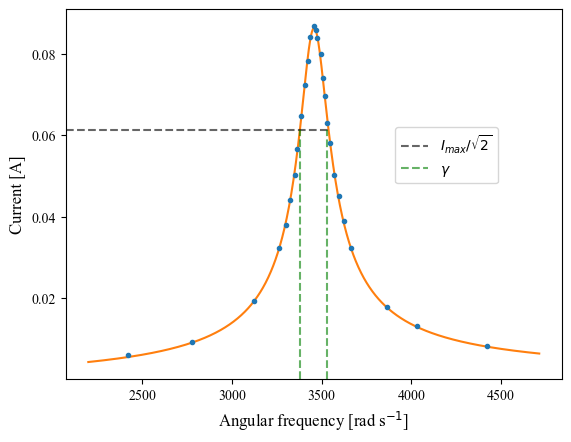

In [49]:
### Part 10.4

f_w = np.array([550, 497, 533, 553, 615, 642, 519, 704, 385,        # Frequencies [Hz] for part 10.4
                   564, 572, 583, 552, 556, 560, 545, 535, 539, 
                   542, 525, 529, 568, 577, 558, 562, 442, 547])
I_w = np.array([86.7, 19.4, 50.2, 83.9, 17.8, 13.1, 32.2, 8.3,
                   5.9, 58.1, 45, 32.3, 85.8, 79.9, 69.5, 78.2, 
                   56.5, 64.6, 72.3, 38, 44.2, 50.3, 38.8, 74, 
                   62.9, 9.3, 84.2]) * 1e-3                         # Measured current [A] from f_w
w_w = f_w * 2 * np.pi                                               # Converting to angular frequencies

I_max = 86.7e-3                                                     # Max current [A] (current at resonant frequency, 550 Hz)
freq_1, freq_2 = 562*2*np.pi, 538*2*np.pi                           # Frequencies [rad/s] where current was I_max / sqrt(2)
gamma = freq_1 - freq_2                                             # Bandwidth [rad/s]

w_array = np.linspace(350, 750, 1001)*2*np.pi
params_guess_w = [w0_want, gamma, I_max]                            # Guess parameters
del_I_w_array = np.ones_like(I_w) * del_I

new_params_w, pcov_w = scipy.optimize.curve_fit(current_with_w, w_w, I_w, p0=params_guess_w, sigma=del_I_w_array, absolute_sigma=True)
params_err_w = np.sqrt(np.diag(pcov_w))
w0_1, gamma_1, I_max_1 = new_params_w[0], new_params_w[1], new_params_w[2]
del_w0_1, del_gamma_1, del_I_max_1 = params_err_w[0], params_err_w[1], params_err_w[2]
R = gamma_1 * L_exp
del_R = get_del_R(L_exp, del_L_exp, gamma_1, del_gamma_1)
print(f"Resonant angular frequency is w0 = ({w0_1:.2f} ± {del_w0_1:.2f}) rad/s.")
print(f"f0 = ({w0_1/(2*np.pi):.3f} ± {del_w0_1/(2*np.pi):.3f}) Hz.")
print(f"Bandwidth is gamma = ({gamma_1:.2f} ± {del_gamma_1:.2f}) rad/s.")
print(f"Max current is I_max = ({I_max_1*1e3:.2f} ± {del_I_max_1*1e3:.2f}) mA.")
print(f"Resistance of the coil is R = ({R:.2f} ± {del_R:.2f}) ohms.")

ax = plt.axes()
ax.errorbar(w_w, I_w, del_I, fmt=".")
ax.plot(w_array, current_with_w(w_array, *new_params_w))
ax.axhline(I_max / np.sqrt(2), xmax = freq_1/(6640), color = 'k', alpha = 0.6, linestyle = '--', label="$I_{max}/\\sqrt{2}$")
ax.axvline(freq_1, ymax = (I_max / np.sqrt(2)) / (I_max*1.05), color = 'green', alpha = 0.6, linestyle = '--')
ax.axvline(freq_2, ymax = (I_max / np.sqrt(2)) / (I_max*1.05), color = 'green', alpha = 0.6, linestyle = '--', label="$\\gamma$")
ax.ticklabel_format(useOffset=False)
ax.legend(bbox_to_anchor=(0.65,0.7))
ax.set_xlabel('Angular frequency [rad s$^{-1}$]', fontsize=12, **title_font)
ax.set_ylabel('Current [A]', fontsize=12, **title_font)

Text(0, 0.5, 'Current [A]')

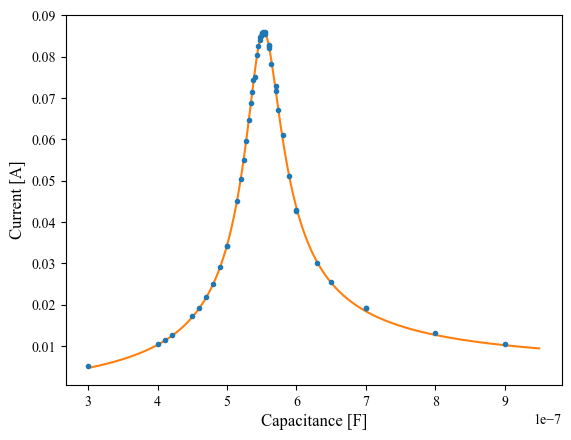

In [4]:
### Part 10.5

C = np.array([0.554, 0.4, 0.3, 0.41, 0.42, 0.46, 0.45, 0.47, 0.48, 0.49, 0.5,           # Capacitance [F]
              0.9, 0.8, 0.7, 0.6, 0.5, 0.54, 0.56, 0.57, 0.58, 0.56, 0.564, 0.554, 
              0.553, 0.552, 0.551, 0.55, 0.549, 0.548, 0.547, 0.545, 0.543, 0.538, 
              0.536, 0.534, 0.531, 0.528, 0.524, 0.52, 0.515, 0.59, 0.6, 0.7, 0.65, 
              0.63, 0.57, 0.56, 0.574]) * 1e-6
I_C = np.array([85.9, 10.6, 5.1, 11.5, 12.6, 19.1, 17.3, 21.8, 24.9, 29.1, 34.1, 
                10.6, 13.2, 19.1, 42.9, 34.2, 75.2, 82.9, 72.8, 61, 82.2, 78.3, 85.6, 
                85.8, 85.9, 85.8, 85.7, 85.1, 84.7, 84.1, 82.5, 80.5, 74.3, 71.5, 68.8, 
                64.6, 59.7, 55.0, 50.4, 45.2, 51.1, 42.6, 19.1, 25.5, 30.0, 71.8, 82.7, 
                67.1]) * 1e-3


C_array = np.linspace(0.3, 0.95, 1001) * 1e-6
params_guess_C = [w0_want, R, L_exp, Vs]
del_I_C_array = np.ones_like(I_C) * del_I

new_params_C, pcov_C = scipy.optimize.curve_fit(current_with_C, C, I_C, p0=params_guess_C, sigma=del_I_C_array, absolute_sigma=True)

ax = plt.axes()
ax.errorbar(C, I_C, del_I, fmt=".")
ax.plot(C_array, current_with_C(C_array, *new_params_C))
ax.ticklabel_format(useOffset=False)
ax.set_xlabel('Capacitance [F]', fontsize=12, **title_font)
ax.set_ylabel('Current [A]', fontsize=12, **title_font)

$Q = \frac{V_C}{V_R} = \frac{V_C}{V_s}$ all at resonance because the impedance of the circuit is equal to the resistance at resonance. This means $V_s = IZ = IR = V_R$

In [10]:
### Part 10.6 and 10.7

V_C_Q1, V_s_Q1 = 46.0, Vs                                              # Voltages [V] across capacitor and source

del_V = 0.1                                                            # Uncertainty [V] of voltmeter

Q1, del_Q1 = get_Q1(V_C_Q1, V_s_Q1, del_V)
print(f"The Q factor using Q = V_C/V_s is {Q1:.1f} ± {del_Q1:.1f}.")

Q2, del_Q2 = get_Q2(w0_1, del_w0_1, gamma_1, del_gamma_1)              # Using fitted angular frequency and bandwidth
print(f"The Q factor using Q = w0/gamma is {Q2:.3f} ± {del_Q2:.3f}.")

The Q factor using Q = V_C/V_s is 22.1 ± 1.1.
The Q factor using Q = w0/gamma is 21.444 ± 0.027.


Above, using $Q = \frac{V_C}{V_s}$, measured the voltage across our source and capacitor and found $Q=22.2 ± 1.1$. Using our fitted values from before, we also calculated $Q=\frac{\omega_0}{\gamma}=21.444 ± 0.027$. These values agree with each other.

In [15]:
### Part 10.8

# Smallest adjustment of variable resistor is 1 ohm, so round to nearest "ones" place

R_added = 105                                                           # Added resistance to circuit [ohms]
del_R_added = 1                                                         # Uncertainty in added resistance [ohms]
R_tot = R_added + R                                                     # Total resistance of circuit [ohms]
del_R_tot = np.sqrt(del_R_added**2 + del_R**2)

gamma_actual = R_tot / L_exp                                            # Bandwidth of circuit with added resistance
del_gamma_actual = np.sqrt((1/L_exp * del_R_tot)**2 + (R_tot / L_exp**2 * del_L_exp)**2)
Q_actual, del_Q_actual = get_Q2(w0_1, del_w0_1, gamma_actual, del_gamma_actual)
print(f"Circuit will have eqiuvalent R = ({R_tot:.1f} ± {del_R_tot:.1f}) ohms.")
print(f"Circuit will have Q = {Q_actual:.3f} ± {del_Q_actual:.3f}.")

Circuit will have eqiuvalent R = (129.4 ± 1.0) ohms.
Circuit will have Q = 4.042 ± 0.034.


Below, using the model fit, we found $Q=3.607 ± 0.027$. This does not agree with the calculated $Q=4.042 ± 0.034$, along with the value for resistance as discussed above.

Resonant angular frequency is w0 = (3453.9 ± 2.5) rad/s.
f0 = (549.7 ± 0.4) Hz.
Bandwidth is gamma = (958 ± 7) rad/s.
Max current is I_max = (15.35 ± 0.04) A.
Resistance of the coil is R = (144.9 ± 1.2) ohms.
The Q factor is 3.607 ± 0.027.


Text(0, 0.5, 'Current [A]')

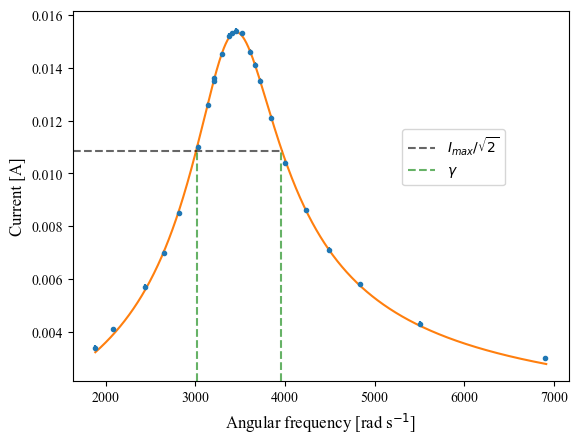

In [48]:
f_Q = np.array([550, 332, 421, 448, 482, 511, 524, 537, 542, 876, 770, 715, 
                673, 637, 611, 592, 583, 575, 560, 511, 500, 300, 389, 1097])
I_Q = np.array([15.4, 4.1, 7, 8.5, 11, 13.6, 14.5, 15.2, 15.3, 4.3, 5.8, 7.1, 
                8.6, 10.4, 12.1, 13.5, 14.1, 14.6, 15.3, 13.5, 12.6, 3.4, 5.7, 3]) * 1e-3
w_Q = f_Q * 2 * np.pi


freq_1_Q, freq_2_Q = 630*2*np.pi, 480*2*np.pi
gamma_Q = freq_1_Q - freq_2_Q
I_max_Q = 15.4e-3

w_array_Q = np.linspace(300, 1100, 1001) * 2*np.pi
params_guess_Q = [w0_want, gamma_Q, I_max_Q]
del_I_array_Q = np.ones_like(I_Q) * del_I

new_params_Q, pcov_Q = scipy.optimize.curve_fit(current_with_w, w_Q, I_Q, p0=params_guess_Q, sigma=del_I_array_Q, absolute_sigma=True)
params_err_Q = np.sqrt(np.diag(pcov_Q))
w0_Q_1, gamma_Q_1, I_max_Q_1 = new_params_Q[0], new_params_Q[1], new_params_Q[2]
del_w0_Q_1, del_gamma_Q_1, del_I_max_Q_1 = params_err_Q[0], params_err_Q[1], params_err_Q[2]
R_Q = gamma_Q_1 * L_exp
del_R_Q = get_del_R(L_exp, del_L_exp, gamma_Q_1, del_gamma_Q_1)
Q_exp, del_Q_exp = get_Q2(w0_Q_1, del_w0_Q_1, gamma_Q_1, del_gamma_Q_1)
print(f"Resonant angular frequency is w0 = ({w0_Q_1:.1f} ± {del_w0_Q_1:.1f}) rad/s.")
print(f"f0 = ({w0_Q_1/(2*np.pi):.1f} ± {del_w0_Q_1/(2*np.pi):.1f}) Hz.")
print(f"Bandwidth is gamma = ({gamma_Q_1:.0f} ± {del_gamma_Q_1:.0f}) rad/s.")
print(f"Max current is I_max = ({I_max_Q_1*1e3:.2f} ± {del_I_max_Q_1*1e3:.2f}) A.")
print(f"Resistance of the coil is R = ({R_Q:.1f} ± {del_R_Q:.1f}) ohms.")
print(f"The Q factor is {Q_exp:.3f} ± {del_Q_exp:.3f}.")

ax = plt.axes()
ax.errorbar(w_Q, I_Q, del_I, fmt=".")
ax.set_xlabel('Angular frequency [rad/s]')
ax.set_ylabel('Current [A]')
ax.plot(w_array_Q, current_with_w(w_array_Q, *new_params_Q))
ax.axhline(I_max_Q_1 / np.sqrt(2), xmax = 0.424, color = 'k', alpha = 0.6, linestyle = '--', label="$I_{max}/\\sqrt{2}$")
ax.axvline(freq_1_Q, ymax = 1/(1.13*np.sqrt(2)), color = 'green', alpha = 0.6, linestyle = '--')
ax.axvline(freq_2_Q, ymax = 1/(1.13*np.sqrt(2)), color = 'green', alpha = 0.6, linestyle = '--', label="$\\gamma$")
ax.ticklabel_format(useOffset=False)
ax.legend(bbox_to_anchor=(0.65,0.7))
ax.set_xlabel('Angular frequency [rad s$^{-1}$]', fontsize=12, **title_font)
ax.set_ylabel('Current [A]', fontsize=12, **title_font)